In [3]:
!pip install missingno

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Load the dataset
df = pd.read_csv(r"D:\Member C\Sleep_health_and_lifestyle_dataset.csv")


# Convert Blood Pressure to numerical columns
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.extract(r'(\d+)/(\d+)').astype(float)

df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


In [ ]:
def basic_info(data):
    # Display first few rows of the dataset
    display(data.head())
    
    # Display dataset information
    print('\nDataset Information:\n')
    data.info()
    
    # Display summary statistics
    print('\nSummary Statistics:\n')
    display(data.describe())

    # Display missing values
    print('\nMissing Values:\n')
    print(data.isnull().sum())

basic_info(df)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0



Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
 13  Systolic_BP              374 non-null    float64
 14  Dia

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000



Missing Values:

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
Systolic_BP                  0
Diastolic_BP                 0
dtype: int64


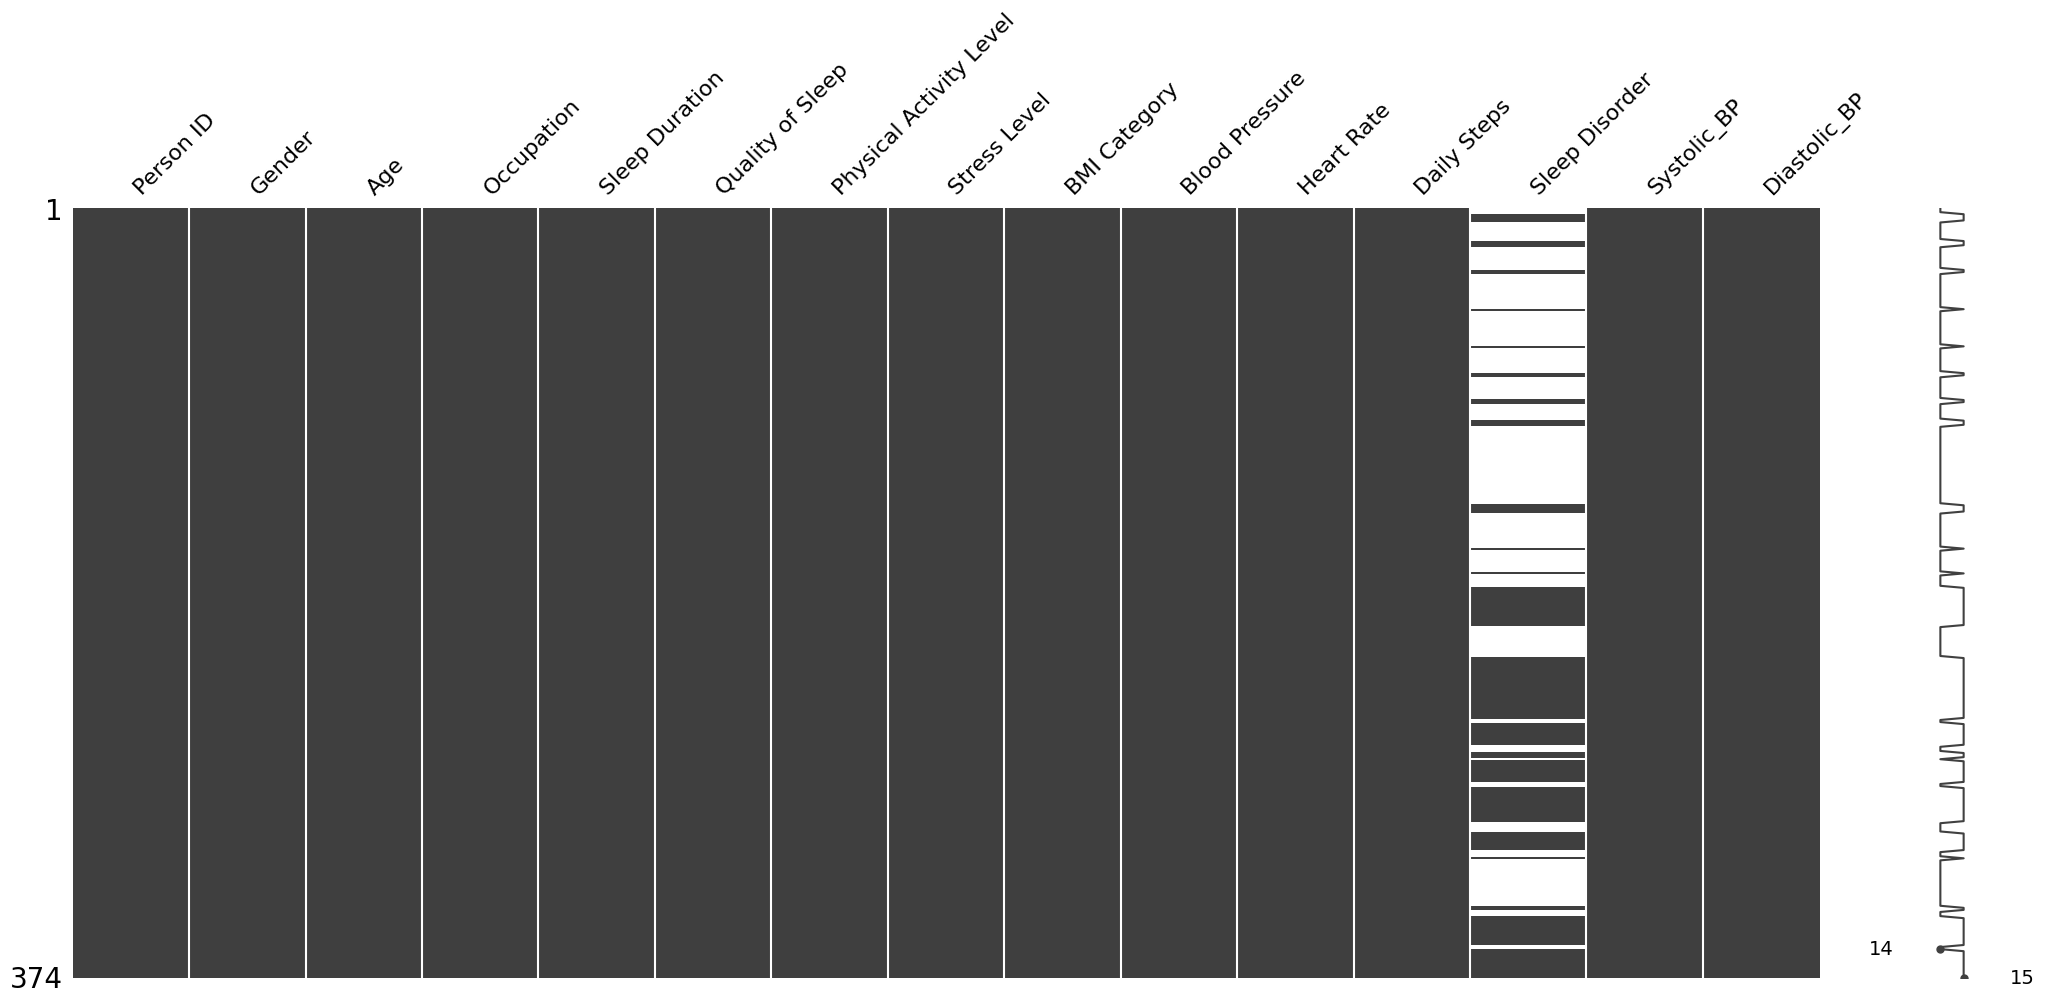

In [6]:
# Visualize missing data
msno.matrix(df)
plt.show()

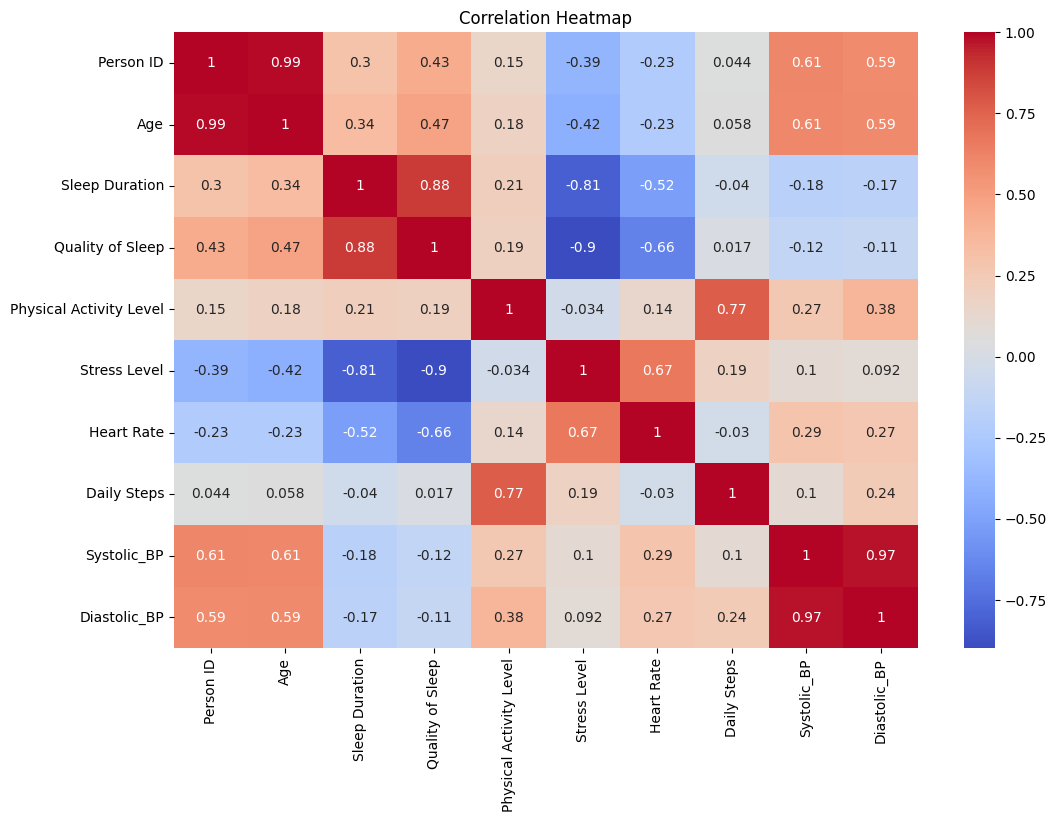

In [7]:
# Generate a heatmap of correlations, considering only numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

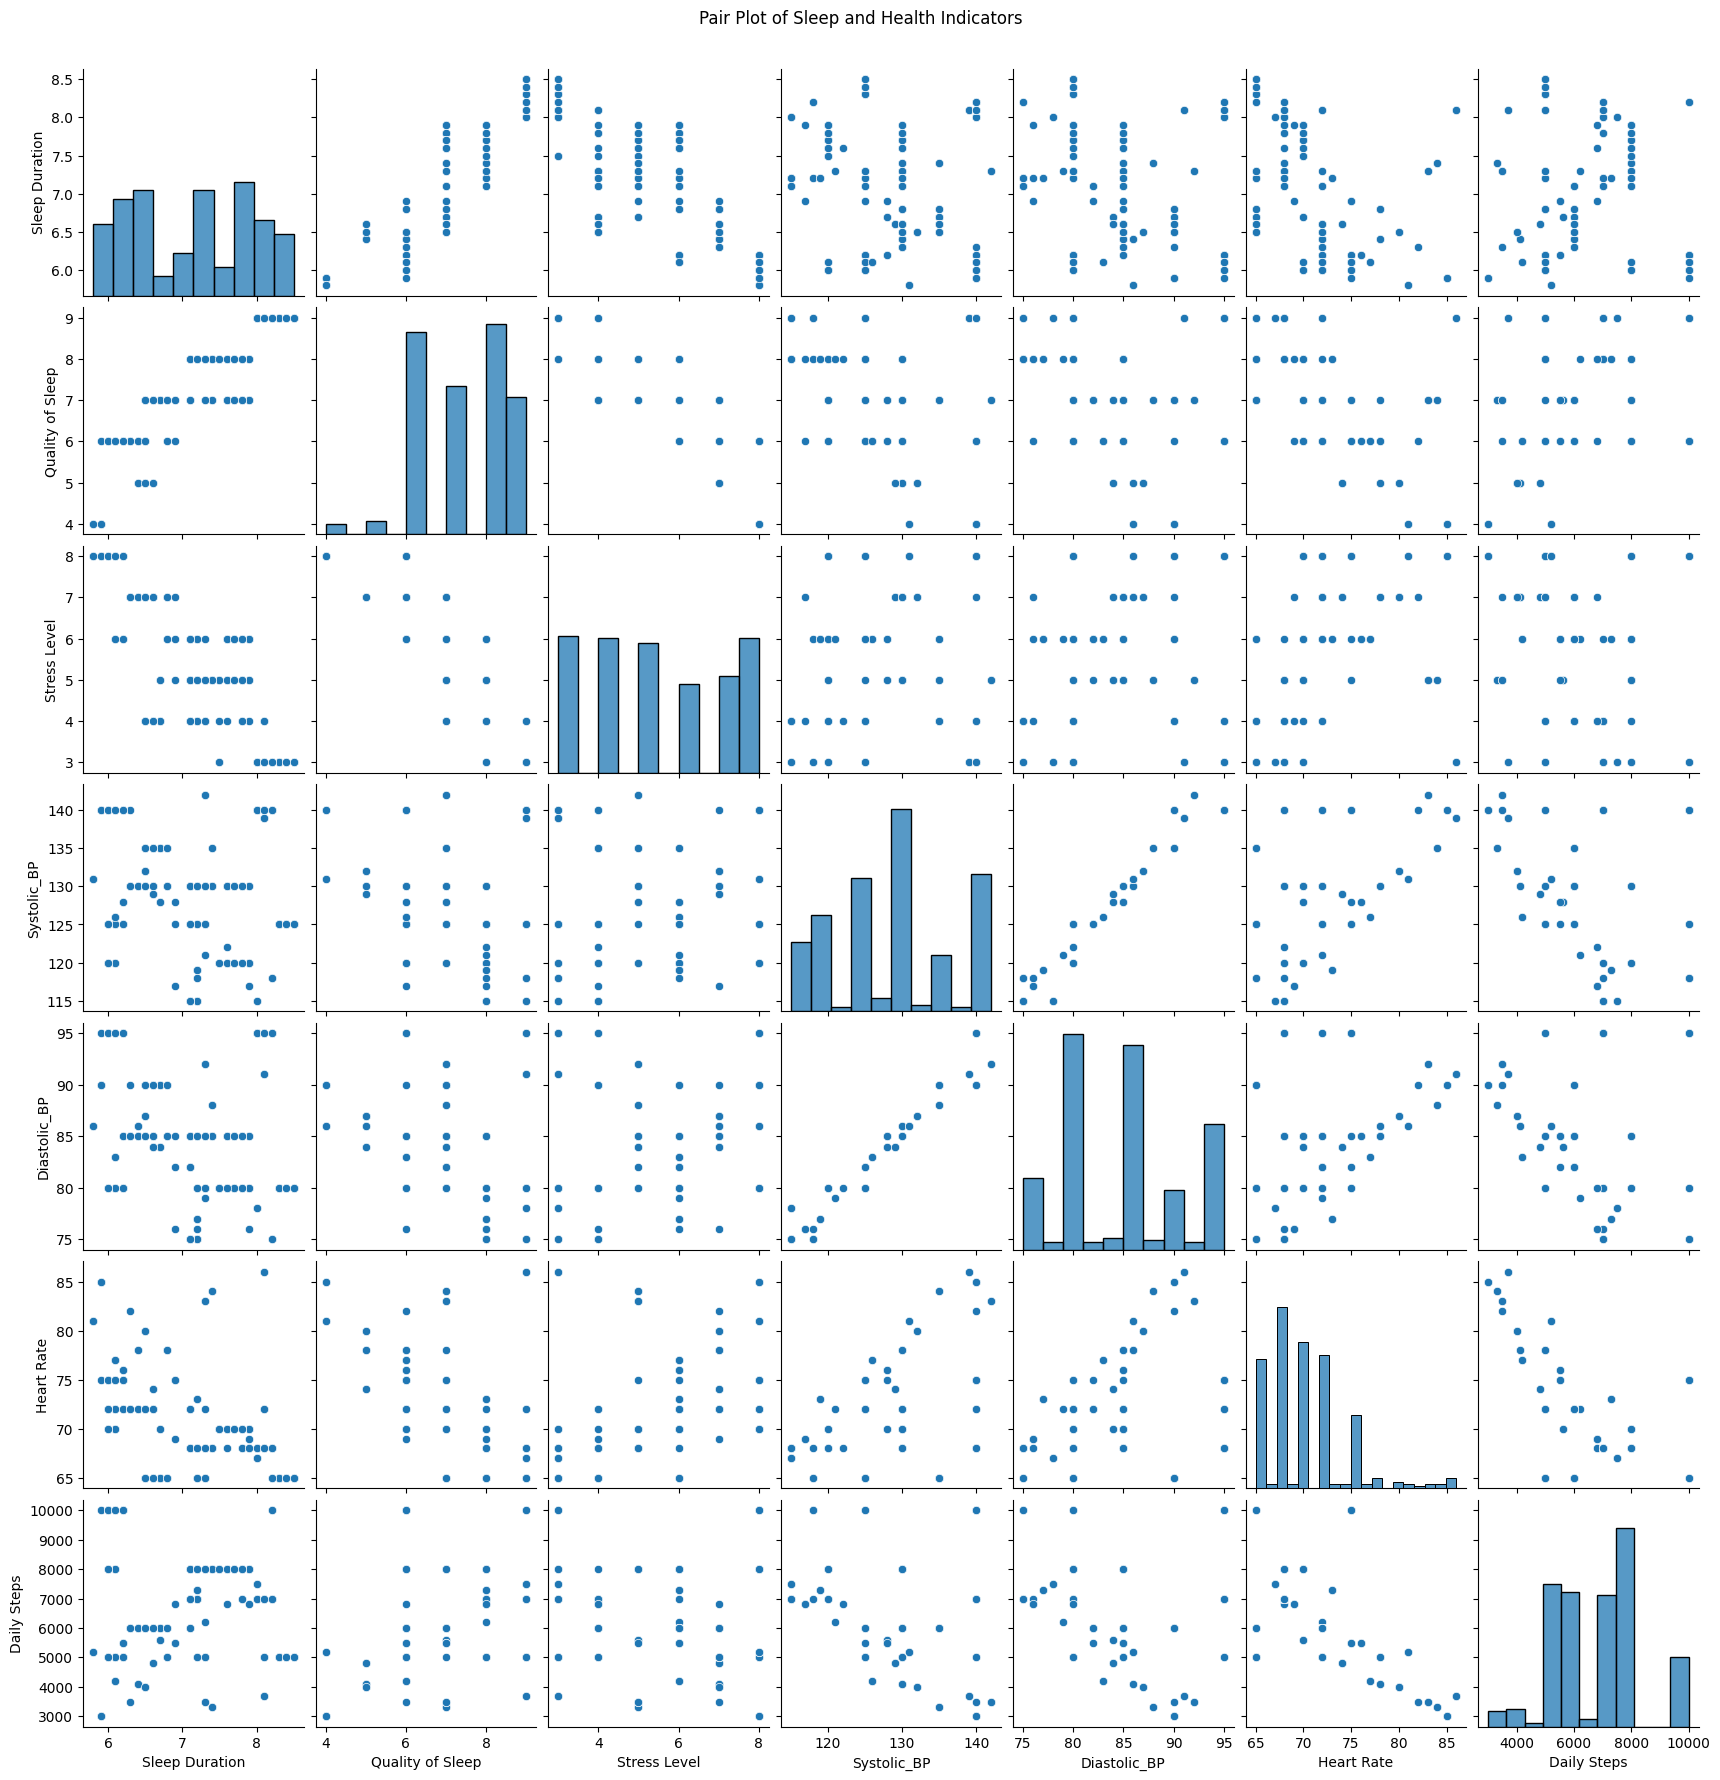

In [8]:

# Plotting Pair Plot
sns.pairplot(df[['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Systolic_BP', 'Diastolic_BP', 'Heart Rate', 'Daily Steps']])
plt.suptitle('Pair Plot of Sleep and Health Indicators', y=1.02)
plt.show()

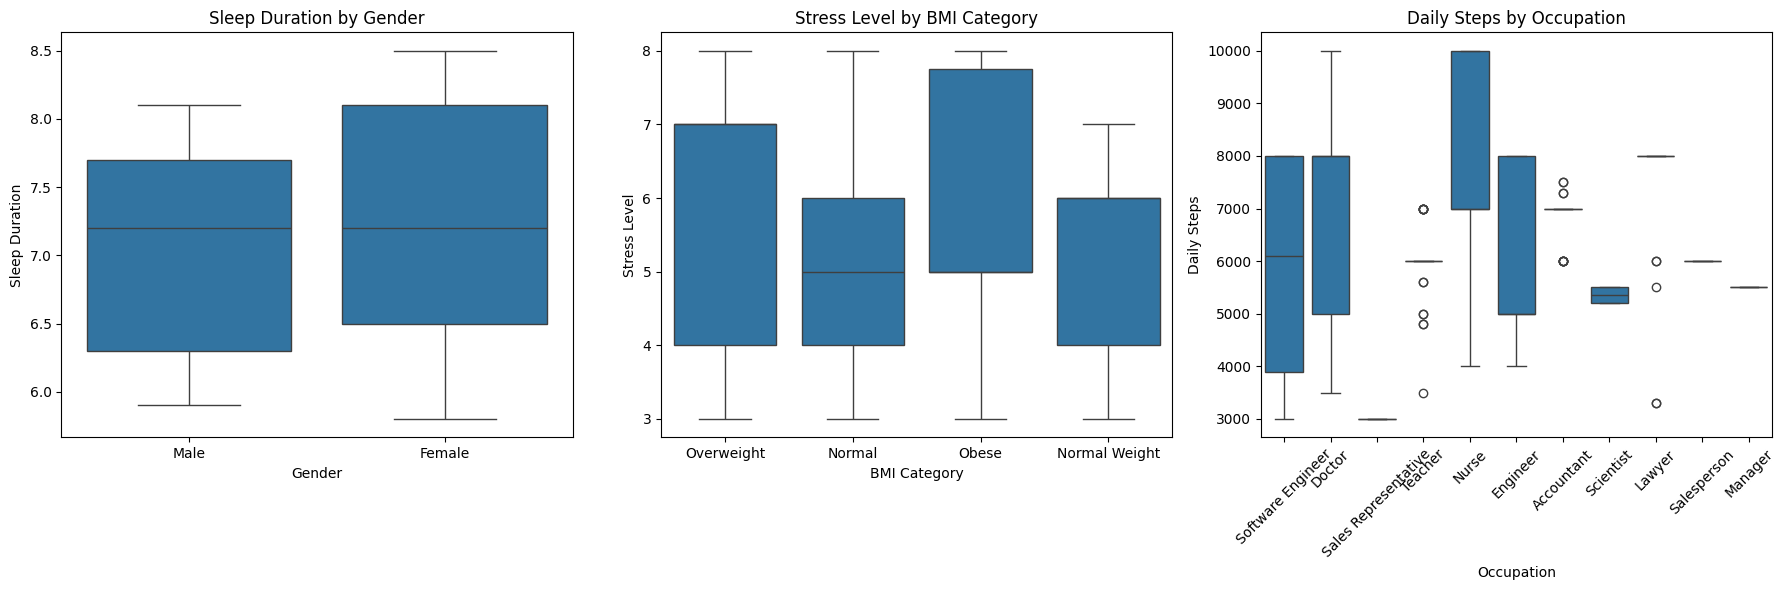

In [10]:
# Plotting Box Plots
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='BMI Category', y='Stress Level', data=df)
plt.title('Stress Level by BMI Category')

plt.subplot(1, 3, 3)
sns.boxplot(x='Occupation', y='Daily Steps', data=df)
plt.title('Daily Steps by Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


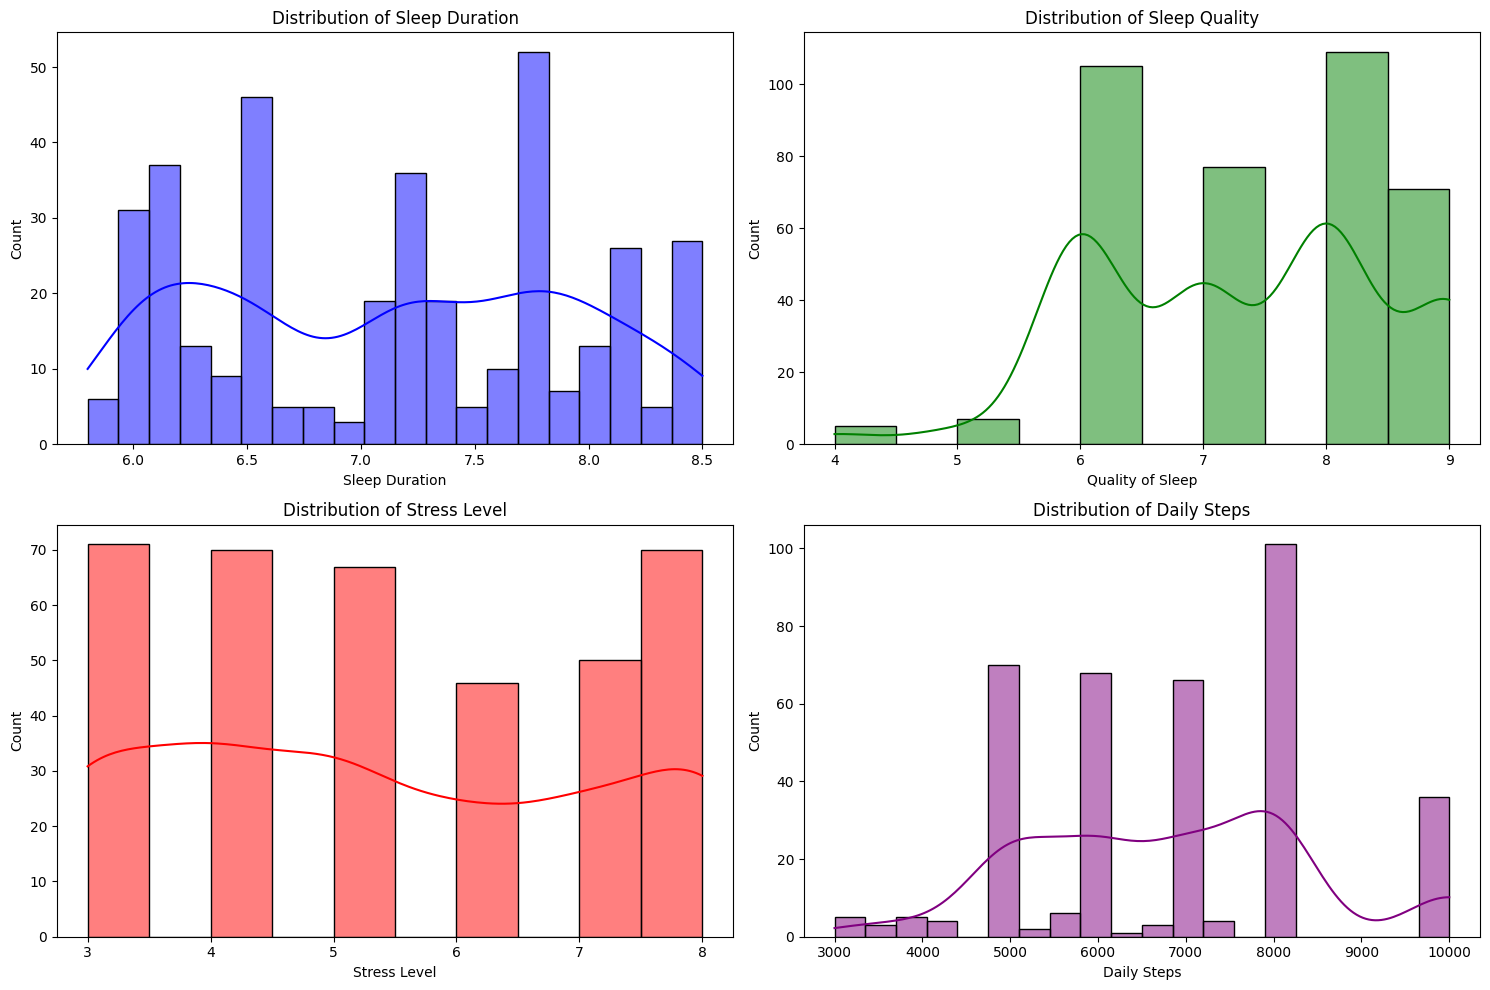

In [29]:
plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
sns.histplot(df["Sleep Duration"], bins=20, kde=True, color="blue")
plt.title("Distribution of Sleep Duration")


plt.subplot(2, 2, 2)
sns.histplot(df["Quality of Sleep"], bins=10, kde=True, color="green")
plt.title("Distribution of Sleep Quality")

plt.subplot(2, 2, 3)
sns.histplot(df["Stress Level"], bins=10, kde=True, color="red")
plt.title("Distribution of Stress Level")


plt.subplot(2, 2, 4)
sns.histplot(df["Daily Steps"], bins=20, kde=True, color="purple")
plt.title("Distribution of Daily Steps")

plt.tight_layout()
plt.show()

C:\Users\kareem Mahmoud\AppData\Local\Temp\ipykernel_3716\1198489327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Sleep Duration", data=df, palette="Set2")


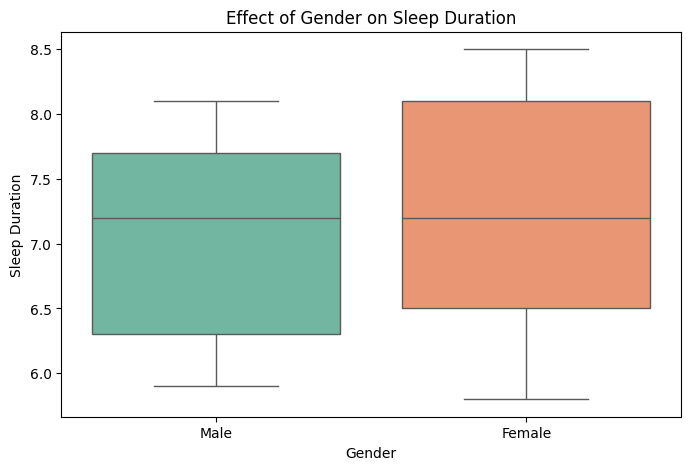

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="Sleep Duration", data=df, palette="Set2")
plt.title("Effect of Gender on Sleep Duration")
plt.show()

C:\Users\kareem Mahmoud\AppData\Local\Temp\ipykernel_3716\1633901687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="BMI Category", y="Quality of Sleep", data=df, palette="Set3")


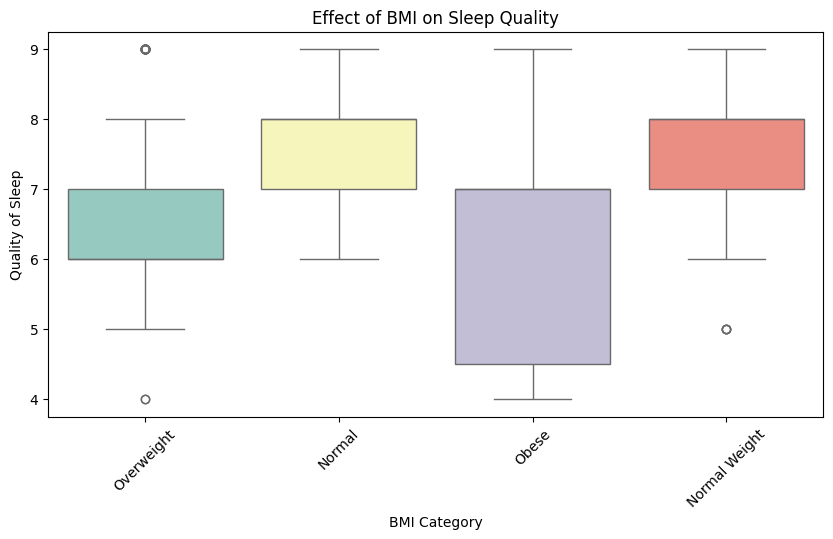

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="BMI Category", y="Quality of Sleep", data=df, palette="Set3")
plt.xticks(rotation=45)
plt.title("Effect of BMI on Sleep Quality")
plt.show()

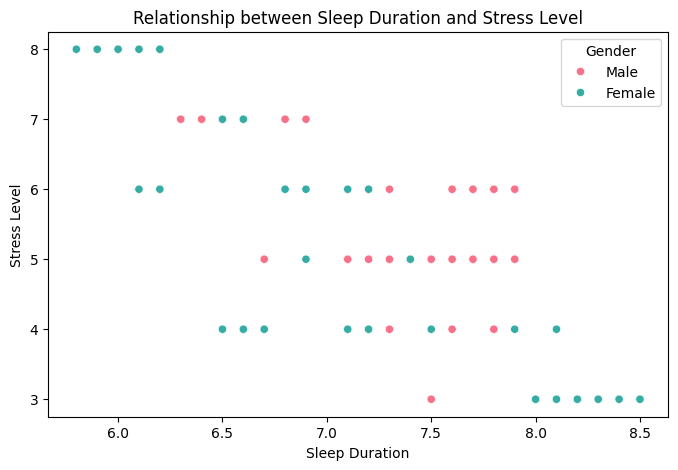

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Sleep Duration", y="Stress Level", data=df, hue="Gender", palette="husl")
plt.title("Relationship between Sleep Duration and Stress Level")
plt.show()


C:\Users\kareem Mahmoud\AppData\Local\Temp\ipykernel_3716\2221107890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sleep Disorder", data=df, palette="pastel")


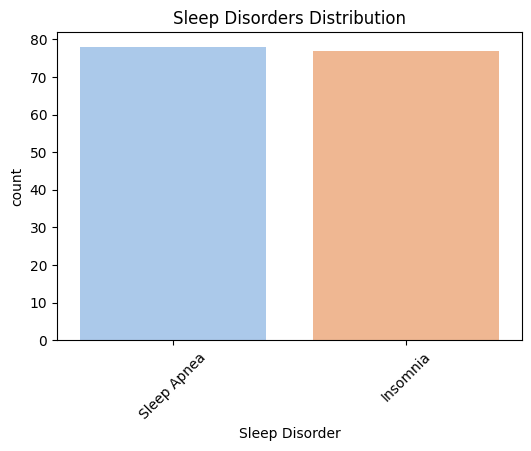

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Sleep Disorder", data=df, palette="pastel")
plt.title("Sleep Disorders Distribution")
plt.xticks(rotation=45)
plt.show()
